In [59]:
### Importacion de librerias ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
### Importacion de CSV ###
df = pd.read_csv(r"C:\Users\samyr\Downloads\Filghts_TEC_Valid.csv")

In [61]:
### Nombre de columnas ###
df.columns

Index(['Flight_ID', 'Aeronave', 'DepartureStation', 'ArrivalStation',
       'Destination_Type', 'Origin_Type', 'STD', 'STA', 'Capacity',
       'Passengers', 'Bookings'],
      dtype='object')

In [62]:
### Informacion de la tabla ###
df.head(5)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0


In [63]:
### Crear campos rutas ###
df['DepartureStation'] = df['DepartureStation'].astype(str)
df["Rutas"] = df[str("DepartureStation")] + [str("-")] +df[str("ArrivalStation")]

In [64]:
### Convertir a fechas ###
df['STD']= pd.to_datetime(df['STD'])
df['STA']= pd.to_datetime(df['STA'])

In [65]:
### Convertir fechas en dias y horas ###
df['Hora_STD'] = df['STD'].dt.strftime('%H:%M:%S')
df['Hora_STA'] = df['STA'].dt.strftime('%H:%M:%S')
df['Dia_STD'] = df['STD'].dt.strftime('%d/%m/%Y')
df['Dia_STA'] = df['STA'].dt.strftime('%d/%m/%Y')
df['Tiempo_de_Vuelo_A'] = (df['STA'] - df['STD'])
df['Tiempo_de_Vuelo'] = df['Tiempo_de_Vuelo_A'].apply(lambda x: '{:02}:{:02}:{:02}'.format(x.days * 24 + x.seconds // 3600, (x.seconds % 3600) // 60, x.seconds % 60))
df.drop('Tiempo_de_Vuelo_A', axis=1, inplace=True)
#df.drop('STD', axis=1, inplace=True)
#df.drop('STA', axis=1, inplace=True)


In [66]:
### Convertir a numeros ###
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')
df['Passengers'] = pd.to_numeric(df['Passengers'], errors='coerce')
df['Bookings'] = pd.to_numeric(df['Bookings'], errors='coerce')

In [67]:
### Porcentaje de ocupacion de vuelo ###
df['Ocupacion'] = df['Passengers']/df['Capacity']
df['Promedio de pasajeros por booking'] = df['Passengers']/df['Bookings']
df['Sobrevendido'] = np.where(df['Ocupacion'] > 1, 1,0)
df['Ocupacion'] = np.where(df['Ocupacion'] > 1, 1, df['Ocupacion'])





In [68]:
### Creacion de DataFrame con datos de 2023 ####
df['Dia_STD']= pd.to_datetime(df['Dia_STD'])
df_2023 = df[df['Dia_STD'].dt.year == 2023]



C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\2623163110.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Dia_STD']= pd.to_datetime(df['Dia_STD'])


In [69]:
### Creacion de DataFrame con datos de 2024 para el modelo ####
df['Dia_STD']= pd.to_datetime(df['Dia_STD'])
df_2024 = df[df['Dia_STD'].dt.year == 2024]

In [70]:
### Quitar duplicados ###
df_2023 = df_2023.drop_duplicates()
df_2023["DepartureStation"].unique()

array(['AT', 'BM', 'AW', 'BA', 'AJ', 'AO', 'AK', 'BH', 'AY', 'BN', 'AF',
       'AU', 'AD', 'BD', 'AR', 'BJ', 'BC', 'BP', 'BG', 'BL', 'BQ', 'AL',
       'AB', 'BF', 'BO', 'AP', 'BT', 'BE', 'BB', 'AZ', 'AI', 'AQ', 'BS',
       'AX', 'AE', 'AV', 'AS', 'AM', 'BK', 'BI', 'AC', 'nan'],
      dtype=object)

In [71]:
### Análisis de nulos

df_2023[df_2023.isnull().any(axis=1)==True]


,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Rutas,Hora_STD,Hora_STA,Dia_STD,Dia_STA,Tiempo_de_Vuelo,Ocupacion,Promedio de pasajeros por booking,Sobrevendido
807,ff4aa5c73c41eb23b06c4513ebce2887,NaN,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-12-09 00:05:00,2023-12-09 05:05:00,240,252.0,149.0,BM-AV,00:05:00,05:05:00,2023-12-09,09/12/2023,05:00:00,1.000000,1.691275,1
1025,e6b83b1264b3cccc98ff3db5d661823f,NaN,AT,BO,MX Amigos y Familia,Ciudad Principal,2023-12-09 06:00:00,2023-12-09 07:45:00,240,216.0,171.0,AT-BO,06:00:00,07:45:00,2023-12-09,09/12/2023,01:45:00,0.900000,1.263158,0
1876,4f98b11271b2d5a74c414217134ba22e,XA-VIJ,BA,NaN,NaN,Ciudad Principal,2023-10-21 15:55:00,2023-10-21 17:30:00,186,42.0,5.0,NaN,15:55:00,17:30:00,2023-10-21,21/10/2023,01:35:00,0.225806,8.400000,0
2599,cb57b4ec264e79372d8e3ffc2a0625a2,NaN,AJ,AR,Playa,MX Amigos y Familia,2023-01-05 09:00:00,2023-01-05 09:55:00,186,118.0,73.0,AJ-AR,09:00:00,09:55:00,2023-01-05,05/01/2023,00:55:00,0.634409,1.616438,0
2987,f975b117e600f23a00ec852ae50dd98e,NaN,AK,BO,MX Amigos y Familia,Playa,2023-12-09 17:30:00,2023-12-09 19:20:00,186,163.0,98.0,AK-BO,17:30:00,19:20:00,2023-12-09,09/12/2023,01:50:00,0.876344,1.663265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241436,9ccbcf9ea9fcdd49ae862ecf62a19fd4,NaN,AT,BQ,MX Amigos y Familia,Ciudad Principal,2023-12-09 20:10:00,2023-12-09 21:40:00,240,205.0,140.0,AT-BQ,20:10:00,21:40:00,2023-12-09,09/12/2023,01:30:00,0.854167,1.464286,0
242021,78175382692c5df926474a7f63f04a04,NaN,AW,BQ,MX Amigos y Familia,Ciudad Principal,2023-12-09 19:45:00,2023-12-09 21:45:00,240,240.0,190.0,AW-BQ,19:45:00,21:45:00,2023-12-09,09/12/2023,02:00:00,1.000000,1.263158,0
243346,3cfa7f104cd573fda507a942e8081e9b,NaN,AO,BQ,MX Amigos y Familia,Ciudad Principal,2023-12-09 12:30:00,2023-12-09 14:30:00,186,172.0,117.0,AO-BQ,12:30:00,14:30:00,2023-12-09,09/12/2023,02:00:00,0.924731,1.470085,0
243419,3aa775b1b73d5528dd6b5d522190f288,NaN,AW,BQ,MX Amigos y Familia,Ciudad Principal,2023-11-06 21:10:00,2023-11-06 23:10:00,186,174.0,18.0,AW-BQ,21:10:00,23:10:00,2023-11-06,06/11/2023,02:00:00,0.935484,9.666667,0


In [72]:
df_2023 = df_2023.dropna().reset_index(drop=True)

In [73]:
df_2023

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings,Rutas,Hora_STD,Hora_STA,Dia_STD,Dia_STA,Tiempo_de_Vuelo,Ocupacion,Promedio de pasajeros por booking,Sobrevendido
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,AT-AZ,11:40:00,14:25:00,2023-10-19,19/10/2023,02:45:00,0.954167,1.458599,0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,BM-AV,00:55:00,04:55:00,2023-07-03,03/07/2023,04:00:00,1.000000,1.807339,1
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,AW-AS,15:15:00,15:55:00,2023-06-26,26/06/2023,00:40:00,0.909091,1.408451,0
3,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,BA-AB,08:40:00,09:50:00,2023-02-10,10/02/2023,01:10:00,0.870968,1.800000,0
4,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,AJ-AR,17:10:00,18:05:00,2023-09-07,07/09/2023,00:55:00,0.762500,1.464000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121719,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0,AO-BT,06:20:00,10:10:00,2023-12-26,26/12/2023,03:50:00,0.922222,1.865169,0
121720,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0,AW-BT,10:25:00,13:50:00,2023-12-28,28/12/2023,03:25:00,0.788889,2.629630,0
121721,90d2cab80b7700b5d854ae393678144b,XA-VYA,BA,BT,Playa,Ciudad Principal,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156.0,61.0,BA-BT,11:45:00,15:00:00,2023-12-23,23/12/2023,03:15:00,0.866667,2.557377,0
121722,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0,BM-BT,07:30:00,14:50:00,2023-12-29,29/12/2023,07:20:00,0.787500,2.197674,0


In [74]:
df_vuelos = df_2023

### Campo de Abastecimiento ###
df_Ab_P = df_vuelos[(df_vuelos['DepartureStation'] == 'AD')]
df_Ab_P['Abastesimiento'] = 'SP'

df_Ab = df_vuelos[(df_vuelos['DepartureStation'] == 'AO')|(df_vuelos['DepartureStation'] == 'AU')|
                              (df_vuelos['DepartureStation'] == 'AW')|(df_vuelos['DepartureStation'] == 'BA')|
                              (df_vuelos['DepartureStation'] == 'BM')|(df_vuelos['DepartureStation'] == 'AT')|
                              (df_vuelos['DepartureStation'] == 'AK')]


df_NOAb = df_vuelos[(df_vuelos['DepartureStation'] == 'AJ')|(df_vuelos['DepartureStation'] == 'BH')|
                              (df_vuelos['DepartureStation'] == 'AY')|(df_vuelos['DepartureStation'] == 'BN')|
                              (df_vuelos['DepartureStation'] == 'AF')|(df_vuelos['DepartureStation'] == 'BD')|
                              (df_vuelos['DepartureStation'] == 'AR')|(df_vuelos['DepartureStation'] == 'BJ')|
                  (df_vuelos['DepartureStation'] == 'BC')|
                              (df_vuelos['DepartureStation'] == 'BP')|(df_vuelos['DepartureStation'] == 'BG')|
                              (df_vuelos['DepartureStation'] == 'BL')|(df_vuelos['DepartureStation'] == 'BQ')|
                              (df_vuelos['DepartureStation'] == 'AL')|(df_vuelos['DepartureStation'] == 'AB')|
                  
                  (df_vuelos['DepartureStation'] == 'BF')|
                              (df_vuelos['DepartureStation'] == 'BO')|(df_vuelos['DepartureStation'] == 'AP')|
                              (df_vuelos['DepartureStation'] == 'BT')|(df_vuelos['DepartureStation'] == 'BE')|
                              (df_vuelos['DepartureStation'] == 'BB')|(df_vuelos['DepartureStation'] == 'AZ')|
                  (df_vuelos['DepartureStation'] == 'AI')|
                              (df_vuelos['DepartureStation'] == 'AQ')|(df_vuelos['DepartureStation'] == 'BS')|
                              (df_vuelos['DepartureStation'] == 'AX')|(df_vuelos['DepartureStation'] == 'AE')|
                              (df_vuelos['DepartureStation'] == 'AV')|(df_vuelos['DepartureStation'] == 'AS')|
                  (df_vuelos['DepartureStation'] == 'AM')|
                              (df_vuelos['DepartureStation'] == 'BK')|(df_vuelos['DepartureStation'] == 'BI')|
                              (df_vuelos['DepartureStation'] == 'AC')|(df_vuelos['DepartureStation'] == 'nan')]



df_Ab_P['Abastesimiento'] = 'SP'
df_Ab['Abastesimiento'] = 'AB'
df_NOAb['Abastesimiento'] = 'NO_AB'

df_2023 = pd.concat([df_Ab_P, df_Ab, df_NOAb], ignore_index=True)
df_2023['Dia_Semana'] = df_2023['Dia_STD'].dt.strftime('%A')

df_2023['Horario'] = np.where((df_2023['Hora_STD'] >= '06:00:00') & (df_2023['Hora_STD'] < '14:00:00'), 'Matutino', np.where((df_2023['Hora_STD'] >= '14:00:00') & (df_2023['Hora_STD'] < '22:00:00'), 'Vespertino','Nocturno'))
del df_Ab_P
del df_Ab
del df_NOAb 
del df_vuelos
df_2023.head

C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\67819931.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ab_P['Abastesimiento'] = 'SP'
C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\67819931.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ab_P['Abastesimiento'] = 'SP'
C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\67819931.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

<bound method NDFrame.head of                                Flight_ID Aeronave DepartureStation  \
0       e157364b7d913ffb206ce9ec3a08ab00   XA-VBY               AD   
1       5f962e8a67af345a43590ca7d4f2f77d   XA-VYD               AD   
2       4f2f7e36e4535eac5a05610e89ed352b   XA-VAU               AD   
3       1439d482b2e1009d63ddcb0b5aa01814   XA-VAE               AD   
4       86da9315a8449b2404d5e5a37df97b18   XA-VII               AD   
...                                  ...      ...              ...   
121719  f3ab1774de9adfe703c07c33e75fa7a1   XA-VAT               AP   
121720  96e2a14d8c51ab39da904b2e98acffbc   XA-VAU               BG   
121721  a0e988a840f991e4064c5a4e9d5ce5d2   XA-VXF               AP   
121722  9727b67d1c1a68204f029063bb43b74a   XA-VII               BG   
121723  cf1cb974b6d37dd17430075932dad552   XA-VIJ               BG   

       ArrivalStation     Destination_Type          Origin_Type  \
0                  AF    Ciudad Fronteriza  MX Amigos y Famili

In [75]:
### Conteo de rutas por avion y dia ###
df_VxD=df_2023[['Flight_ID', 'Aeronave', 'Rutas','Dia_STD','Dia_Semana']]
Conteo_por_dia = df_VxD.groupby(['Aeronave','Dia_STD','Dia_Semana'])['Rutas'].nunique()
df_VxD = pd.DataFrame(Conteo_por_dia)
df_VxD.head

<bound method NDFrame.head of                                 Rutas
Aeronave Dia_STD    Dia_Semana       
9H-SWB   2023-11-16 Thursday        4
         2023-11-17 Friday          2
         2023-11-19 Sunday          4
         2023-11-20 Monday          2
         2023-11-23 Thursday        2
...                               ...
XA-VYF   2023-12-27 Wednesday       4
         2023-12-28 Thursday        7
         2023-12-29 Friday          2
         2023-12-30 Saturday        4
         2023-12-31 Sunday          6

[22815 rows x 1 columns]>

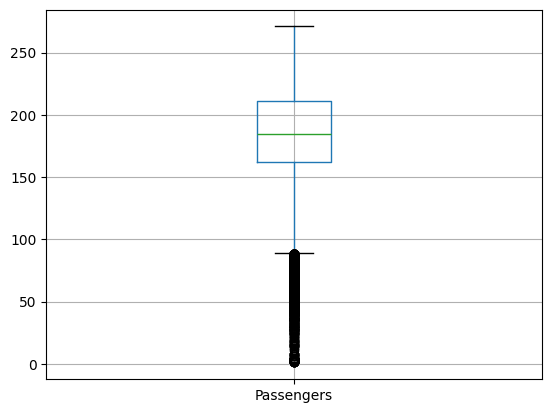

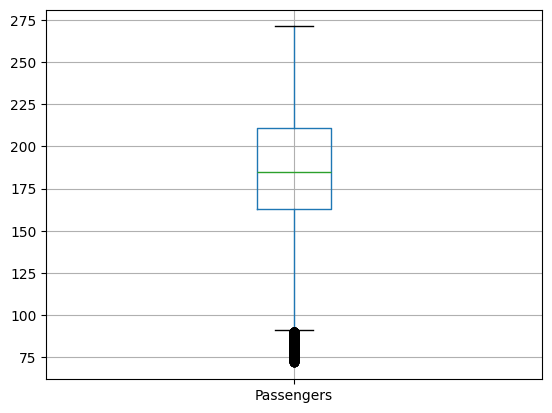

In [76]:
### ELIMINACION DEL 4% TRIM CHECAR CON Y SIN ###
df_2023[['Passengers']].boxplot()
plt.show()
f_df_2023 = df_2023[df_2023['Ocupacion'] >= 0.4]
#f_df_2023.head(5)
f_df_2023[['Passengers']].boxplot()
plt.show()


In [77]:
f_df_2023.head(5)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Hora_STA,Dia_STD,Dia_STA,Tiempo_de_Vuelo,Ocupacion,Promedio de pasajeros por booking,Sobrevendido,Abastesimiento,Dia_Semana,Horario
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,09:20:00,2023-12-17,17/12/2023,01:10:00,0.587500,1.985915,0,SP,Sunday,Matutino
1,5f962e8a67af345a43590ca7d4f2f77d,XA-VYD,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-02-12 15:10:00,2023-02-12 16:20:00,180,184.0,...,16:20:00,2023-02-12,12/02/2023,01:10:00,1.000000,1.688073,1,SP,Sunday,Vespertino
2,4f2f7e36e4535eac5a05610e89ed352b,XA-VAU,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-03-30 15:10:00,2023-03-30 17:20:00,186,188.0,...,17:20:00,2023-03-30,30/03/2023,02:10:00,1.000000,1.693694,1,SP,Thursday,Vespertino
3,1439d482b2e1009d63ddcb0b5aa01814,XA-VAE,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-06-02 15:10:00,2023-06-02 17:25:00,186,187.0,...,17:25:00,2023-06-02,02/06/2023,02:15:00,1.000000,1.571429,1,SP,Friday,Vespertino
4,86da9315a8449b2404d5e5a37df97b18,XA-VII,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-11-15 15:10:00,2023-11-15 16:20:00,186,178.0,...,16:20:00,2023-11-15,15/11/2023,01:10:00,0.956989,1.780000,0,SP,Wednesday,Vespertino


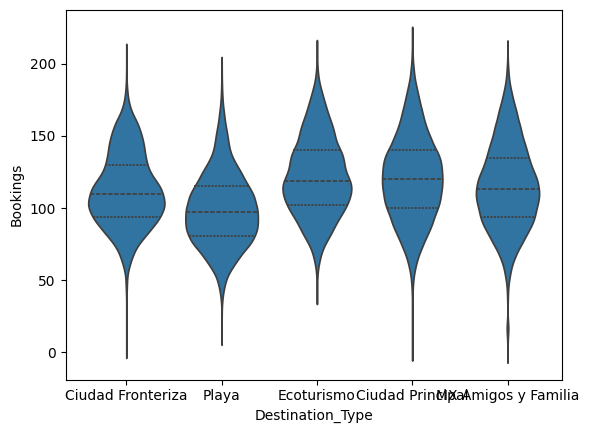

In [78]:
### Violin plots ###
ax = sns.violinplot(x='Destination_Type', y='Bookings', data=f_df_2023, inner='quartile')
ax.set_xlabel('Destination_Type')
ax.set_ylabel('Bookings')
ax.plot()
plt.show()



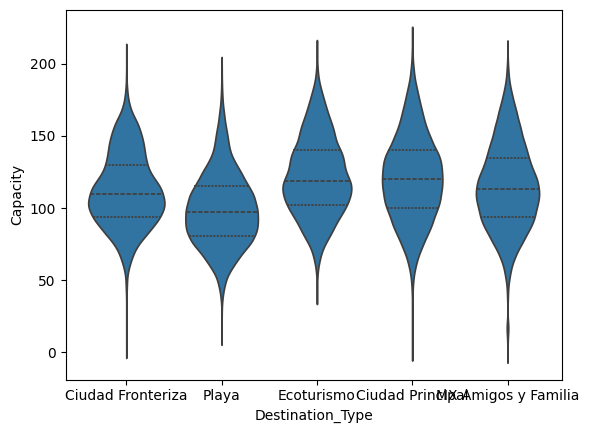

In [79]:
### Vilone plots 2 ###
ax = sns.violinplot(x='Destination_Type', y='Bookings', data=f_df_2023, inner='quartile')
ax.set_xlabel('Destination_Type')
ax.set_ylabel('Capacity')
ax.plot()
plt.show()

In [80]:
### Cambio de Horas a Minutos y Agregar MES ### 
f_df_2023.columns
def time_to_minutes(time_str):
    parts = time_str.split(':')
    hours = int(parts[0])
    minutes = int(parts[1])
    seconds = int(parts[2])
    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes
f_df_2023['Tiempo_en_minutos'] = f_df_2023['Tiempo_de_Vuelo'].apply(time_to_minutes)
f_df_2023.drop(columns=['Tiempo_de_Vuelo'], inplace=True)
f_df_2023['Mes'] = f_df_2023['Dia_STD'].dt.strftime('%B')
f_df_2023.head(5)



C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\2133273505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df_2023['Tiempo_en_minutos'] = f_df_2023['Tiempo_de_Vuelo'].apply(time_to_minutes)
C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\2133273505.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df_2023.drop(columns=['Tiempo_de_Vuelo'], inplace=True)
C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\2133273505.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Dia_STD,Dia_STA,Ocupacion,Promedio de pasajeros por booking,Sobrevendido,Abastesimiento,Dia_Semana,Horario,Tiempo_en_minutos,Mes
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,2023-12-17,17/12/2023,0.587500,1.985915,0,SP,Sunday,Matutino,70.0,December
1,5f962e8a67af345a43590ca7d4f2f77d,XA-VYD,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-02-12 15:10:00,2023-02-12 16:20:00,180,184.0,...,2023-02-12,12/02/2023,1.000000,1.688073,1,SP,Sunday,Vespertino,70.0,February
2,4f2f7e36e4535eac5a05610e89ed352b,XA-VAU,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-03-30 15:10:00,2023-03-30 17:20:00,186,188.0,...,2023-03-30,30/03/2023,1.000000,1.693694,1,SP,Thursday,Vespertino,130.0,March
3,1439d482b2e1009d63ddcb0b5aa01814,XA-VAE,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-06-02 15:10:00,2023-06-02 17:25:00,186,187.0,...,2023-06-02,02/06/2023,1.000000,1.571429,1,SP,Friday,Vespertino,135.0,June
4,86da9315a8449b2404d5e5a37df97b18,XA-VII,AD,AF,Ciudad Fronteriza,MX Amigos y Familia,2023-11-15 15:10:00,2023-11-15 16:20:00,186,178.0,...,2023-11-15,15/11/2023,0.956989,1.780000,0,SP,Wednesday,Vespertino,70.0,November


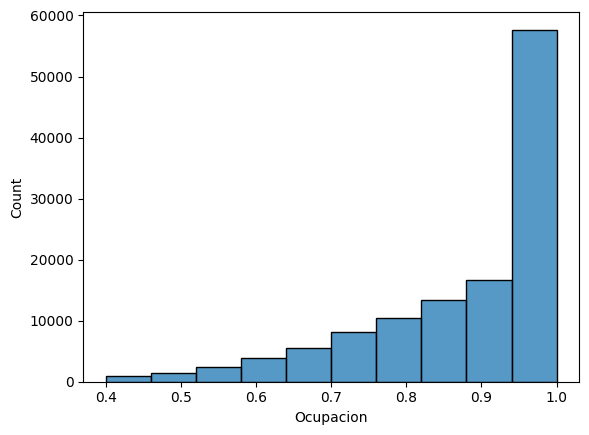

In [81]:
### Histograma de ocupacion ###
sns.histplot(f_df_2023['Ocupacion'], bins=10)
plt.show()

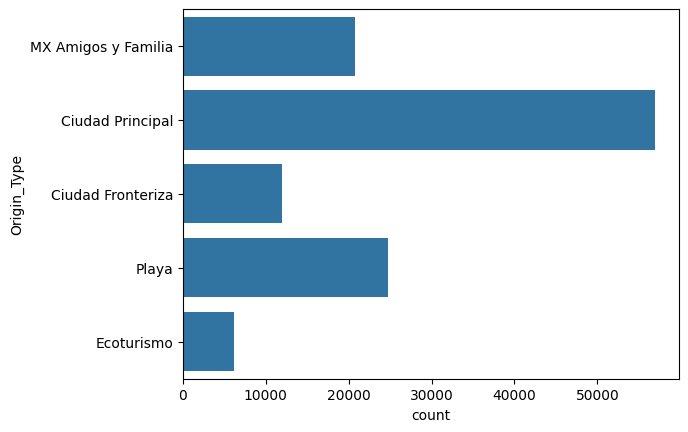

In [82]:
### BarPlot de Origen ###
sns.countplot(f_df_2023['Origin_Type'])
plt.show()

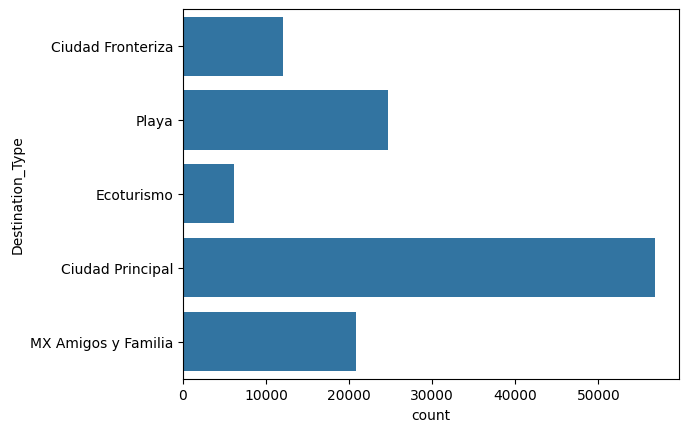

In [83]:
### BarPlot de Destino ###
sns.countplot(f_df_2023['Destination_Type'])
plt.show()

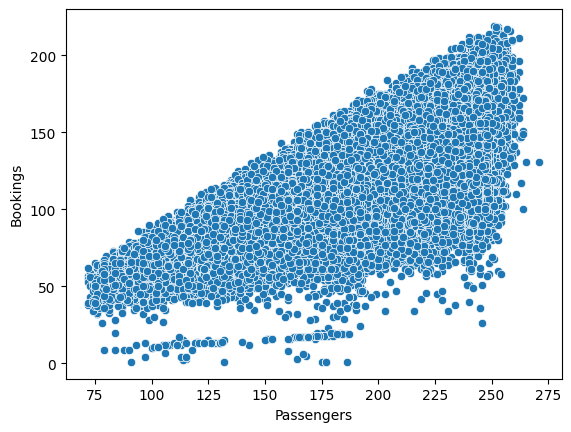

In [84]:
###  Scatter Plot Bookings x Passengers ###
sns.scatterplot(x='Passengers', y='Bookings', data=f_df_2023)
plt.show()

In [85]:
### ANOVA F-test ###
from sklearn.feature_selection import SelectKBest, chi2, f_classif

numeric_features = f_df_2023.select_dtypes(include=['int', 'float'])

X = numeric_features.drop(columns=['Ocupacion'])
y = f_df_2023['Ocupacion']

selector_f_classif = SelectKBest(f_classif, k=5)  # Select top 5 features
X_f_classif = selector_f_classif.fit_transform(X, y)

print("Selected Features:", X.columns[selector_f_classif.get_support()])

Selected Features: Index(['Capacity', 'Passengers', 'Bookings', 'Sobrevendido',
       'Tiempo_en_minutos'],
      dtype='object')


In [86]:
### Perform Chi-squared test of independence ###
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(f_df_2023['Destination_Type'], f_df_2023['Origin_Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")

Chi-squared statistic: 23779.550620112528
p-value: 0.0
Degrees of freedom: 16
Expected frequencies table:
[[ 1200.88635968  5722.39023783   621.73691589  2082.86888931
   2480.11759729]
 [ 5635.37843331 26853.36066431  2917.6139597   9774.24243656
  11638.40450613]
 [  613.93182742  2925.47039744   317.85195816  1064.82973446
   1267.91608252]
 [ 2063.2671738   9831.75455217  1068.21878603  3578.61921906
   4261.14026894]
 [ 2442.5362058  11639.02414826  1264.57838022  4236.43972061
   5044.42154512]]
There is a significant association between the variables.


In [87]:
### Perform Chi-squared test of independence ###
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(f_df_2023['Destination_Type'], f_df_2023['Rutas'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")

Chi-squared statistic: 482188.0
p-value: 0.0
Degrees of freedom: 1096
Expected frequencies table:
[[  8.638025    24.70876919  12.45482675 ...   2.10928518   2.41061163
    0.60265291]
 [ 40.53550897 115.95040938  58.44654782 ...   9.89820568  11.31223506
    2.82805877]
 [  4.4160369   12.6319195    6.36730902 ...   1.07833459   1.23238239
    0.3080956 ]
 [ 14.84116569  42.45263673  21.39889006 ...   3.62400557   4.14172066
    1.03543016]
 [ 17.56926344  50.25626519  25.33242636 ...   4.29016898   4.90305026
    1.22576257]]
There is a significant association between the variables.


In [88]:
### Perform Chi-squared test of independence ###

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(f_df_2023['Aeronave'], f_df_2023['Rutas'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("There is a significant association between the variables.")
else:
    print("There is no significant association between the variables.")

Chi-squared statistic: 112551.46753719906
p-value: 0.0
Degrees of freedom: 22742
Expected frequencies table:
[[5.49329307e-02 1.57133732e-01 7.92056210e-02 ... 1.34138552e-02
  1.53301202e-02 3.83253005e-03]
 [6.34939069e-02 1.81622106e-01 9.15493542e-02 ... 1.55043261e-02
  1.77192298e-02 4.42980746e-03]
 [2.28292699e-02 6.53023302e-02 3.29166217e-02 ... 5.57458916e-03
  6.37095905e-03 1.59273976e-03]
 ...
 [1.17000008e+00 3.34674442e+00 1.68697686e+00 ... 2.85697695e-01
  3.26511651e-01 8.16279128e-02]
 [1.35691473e+00 3.88140725e+00 1.95648170e+00 ... 3.31339643e-01
  3.78673878e-01 9.46684696e-02]
 [4.59439057e-01 1.31420940e+00 6.62447012e-01 ... 1.12188607e-01
  1.28215551e-01 3.20538877e-02]]
There is a significant association between the variables.


In [89]:
f_df_2023.columns

Index(['Flight_ID', 'Aeronave', 'DepartureStation', 'ArrivalStation',
       'Destination_Type', 'Origin_Type', 'STD', 'STA', 'Capacity',
       'Passengers', 'Bookings', 'Rutas', 'Hora_STD', 'Hora_STA', 'Dia_STD',
       'Dia_STA', 'Ocupacion', 'Promedio de pasajeros por booking',
       'Sobrevendido', 'Abastesimiento', 'Dia_Semana', 'Horario',
       'Tiempo_en_minutos', 'Mes'],
      dtype='object')

In [90]:
f_df_2023[f_df_2023.isnull().any(axis=1)==True]

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Dia_STD,Dia_STA,Ocupacion,Promedio de pasajeros por booking,Sobrevendido,Abastesimiento,Dia_Semana,Horario,Tiempo_en_minutos,Mes


In [91]:
### Diferenciar entre Destination Type y Origin Type ###

f_df_2023["Destination_Type"] = f_df_2023["Destination_Type"].astype(str) + '_D'
f_df_2023["Origin_Type"] = f_df_2023["Origin_Type"].astype(str) + '_O'
f_df_2023.head()

C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\2273852947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df_2023["Destination_Type"] = f_df_2023["Destination_Type"].astype(str) + '_D'
C:\Users\samyr\AppData\Local\Temp\ipykernel_27876\2273852947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df_2023["Origin_Type"] = f_df_2023["Origin_Type"].astype(str) + '_O'


,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Dia_STD,Dia_STA,Ocupacion,Promedio de pasajeros por booking,Sobrevendido,Abastesimiento,Dia_Semana,Horario,Tiempo_en_minutos,Mes
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,2023-12-17,17/12/2023,0.587500,1.985915,0,SP,Sunday,Matutino,70.0,December
1,5f962e8a67af345a43590ca7d4f2f77d,XA-VYD,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-02-12 15:10:00,2023-02-12 16:20:00,180,184.0,...,2023-02-12,12/02/2023,1.000000,1.688073,1,SP,Sunday,Vespertino,70.0,February
2,4f2f7e36e4535eac5a05610e89ed352b,XA-VAU,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-03-30 15:10:00,2023-03-30 17:20:00,186,188.0,...,2023-03-30,30/03/2023,1.000000,1.693694,1,SP,Thursday,Vespertino,130.0,March
3,1439d482b2e1009d63ddcb0b5aa01814,XA-VAE,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-06-02 15:10:00,2023-06-02 17:25:00,186,187.0,...,2023-06-02,02/06/2023,1.000000,1.571429,1,SP,Friday,Vespertino,135.0,June
4,86da9315a8449b2404d5e5a37df97b18,XA-VII,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-11-15 15:10:00,2023-11-15 16:20:00,186,178.0,...,2023-11-15,15/11/2023,0.956989,1.780000,0,SP,Wednesday,Vespertino,70.0,November


In [92]:
f_df_2023[f_df_2023.isnull().any(axis=1)==True]

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,...,Dia_STD,Dia_STA,Ocupacion,Promedio de pasajeros por booking,Sobrevendido,Abastesimiento,Dia_Semana,Horario,Tiempo_en_minutos,Mes


In [93]:
print("Número de registros: ", f_df_2023.shape[0])
print("Número de rutas: ", f_df_2023["Rutas"].unique().shape[0])
print("Número de aeronaves: ", f_df_2023["Aeronave"].unique().shape[0])
print("Número de DepartureStation: ", f_df_2023["DepartureStation"].unique().shape[0])

Número de registros:  120547
Número de rutas:  275
Número de aeronaves:  84
Número de DepartureStation:  41


In [94]:
f_df_2023.reset_index(drop=True, inplace = True)

In [95]:
f_df_2023["Destination_Type"]

0           Ciudad Fronteriza_D
1           Ciudad Fronteriza_D
2           Ciudad Fronteriza_D
3           Ciudad Fronteriza_D
4           Ciudad Fronteriza_D
                  ...          
120542    MX Amigos y Familia_D
120543    MX Amigos y Familia_D
120544    MX Amigos y Familia_D
120545    MX Amigos y Familia_D
120546    MX Amigos y Familia_D
Name: Destination_Type, Length: 120547, dtype: object

In [96]:
### Uso de OneHotEncoder para convertir variables de "Destination_Type" y "Dia_Semana" en binario, 
### para consecuentemente ser utilizadas en el análisis de correlación
from sklearn.preprocessing import OneHotEncoder

codificador = OneHotEncoder()

codificacionDest = codificador.fit_transform(f_df_2023[["Destination_Type"]])

nuevas_colsDest = pd.DataFrame(codificacionDest.toarray(),
                           columns=codificador.categories_)


codificacionDia = codificador.fit_transform(f_df_2023[["Dia_Semana"]])

nuevas_colsDia = pd.DataFrame(codificacionDia.toarray(),
                           columns=codificador.categories_)


codificacionMes = codificador.fit_transform(f_df_2023[["Mes"]])

nuevas_colsMes = pd.DataFrame(codificacionMes.toarray(),
                           columns=codificador.categories_)


codificacionOrig = codificador.fit_transform(f_df_2023[["Origin_Type"]])

nuevas_colsOrig = pd.DataFrame(codificacionOrig.toarray(),
                           columns=codificador.categories_)


codificacionHor = codificador.fit_transform(f_df_2023[["Horario"]])

nuevas_colsHor = pd.DataFrame(codificacionHor.toarray(),
                           columns=codificador.categories_)

f_df_2023 = pd.concat([f_df_2023, nuevas_colsDest], axis="columns")
f_df_2023 = pd.concat([f_df_2023, nuevas_colsDia], axis="columns")
f_df_2023 = pd.concat([f_df_2023, nuevas_colsMes], axis="columns")
f_df_2023 = pd.concat([f_df_2023, nuevas_colsOrig], axis="columns")
f_df_2023 = pd.concat([f_df_2023, nuevas_colsHor], axis="columns")

f_df_2023.columns = [str(col).strip("()").strip("',").title() for col in f_df_2023.columns]

f_df_2023.head()

,Flight_Id,Aeronave,Departurestation,Arrivalstation,Destination_Type,Origin_Type,Std,Sta,Capacity,Passengers,...,October,September,Ciudad Fronteriza_O,Ciudad Principal_O,Ecoturismo_O,Mx Amigos Y Familia_O,Playa_O,Matutino,Nocturno,Vespertino
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,5f962e8a67af345a43590ca7d4f2f77d,XA-VYD,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-02-12 15:10:00,2023-02-12 16:20:00,180,184.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,4f2f7e36e4535eac5a05610e89ed352b,XA-VAU,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-03-30 15:10:00,2023-03-30 17:20:00,186,188.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1439d482b2e1009d63ddcb0b5aa01814,XA-VAE,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-06-02 15:10:00,2023-06-02 17:25:00,186,187.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,86da9315a8449b2404d5e5a37df97b18,XA-VII,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-11-15 15:10:00,2023-11-15 16:20:00,186,178.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [97]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical data to numerical data using LabelEncoder
le = LabelEncoder()
f_df_2023["Rutas_Nuevas"] = le.fit_transform(f_df_2023["Rutas"])

# View the converted DataFrame
df_modelo_1 = f_df_2023
df_modelo_1

,Flight_Id,Aeronave,Departurestation,Arrivalstation,Destination_Type,Origin_Type,Std,Sta,Capacity,Passengers,...,September,Ciudad Fronteriza_O,Ciudad Principal_O,Ecoturismo_O,Mx Amigos Y Familia_O,Playa_O,Matutino,Nocturno,Vespertino,Rutas_Nuevas
0,e157364b7d913ffb206ce9ec3a08ab00,XA-VBY,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-12-17 08:10:00,2023-12-17 09:20:00,240,141.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5
1,5f962e8a67af345a43590ca7d4f2f77d,XA-VYD,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-02-12 15:10:00,2023-02-12 16:20:00,180,184.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
2,4f2f7e36e4535eac5a05610e89ed352b,XA-VAU,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-03-30 15:10:00,2023-03-30 17:20:00,186,188.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
3,1439d482b2e1009d63ddcb0b5aa01814,XA-VAE,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-06-02 15:10:00,2023-06-02 17:25:00,186,187.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
4,86da9315a8449b2404d5e5a37df97b18,XA-VII,AD,AF,Ciudad Fronteriza_D,MX Amigos y Familia_O,2023-11-15 15:10:00,2023-11-15 16:20:00,186,178.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120542,f3ab1774de9adfe703c07c33e75fa7a1,XA-VAT,AP,BQ,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-10-27 18:55:00,2023-10-27 23:15:00,186,169.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,74
120543,96e2a14d8c51ab39da904b2e98acffbc,XA-VAU,BG,BQ,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-11-21 15:05:00,2023-11-21 17:15:00,186,169.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,207
120544,a0e988a840f991e4064c5a4e9d5ce5d2,XA-VXF,AP,BQ,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-10-25 18:50:00,2023-10-25 23:10:00,240,169.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,74
120545,9727b67d1c1a68204f029063bb43b74a,XA-VII,BG,BQ,MX Amigos y Familia_D,MX Amigos y Familia_O,2023-10-24 14:35:00,2023-10-24 15:45:00,186,160.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,207


In [98]:
###Exportar DataSet Limpio ###
df_modelo_1.to_csv("Dataset_Viva.csv")

MODELO

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import joblib

In [104]:
df = df_modelo_1 
df = df[['Std', 'Dia_Std','Rutas_Nuevas','Tiempo_En_Minutos','Passengers', 'Ocupacion', 'Bookings', 'Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O', 'Mx Amigos Y Familia_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D',
       'Ciudad Principal_D', 'January']]
print("Shape: ", df.shape)
df.head()

Shape:  (120547, 16)


,Std,Dia_Std,Rutas_Nuevas,Tiempo_En_Minutos,Passengers,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,Ciudad Principal_O,Mx Amigos Y Familia_O,Mx Amigos Y Familia_D,Ciudad Fronteriza_D,Ciudad Principal_D,January
0,2023-12-17 08:10:00,2023-12-17,5,70.0,141.0,0.587500,71.0,240,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2023-02-12 15:10:00,2023-02-12,5,70.0,184.0,1.000000,109.0,180,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2023-03-30 15:10:00,2023-03-30,5,130.0,188.0,1.000000,111.0,186,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2023-06-02 15:10:00,2023-06-02,5,135.0,187.0,1.000000,119.0,186,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2023-11-15 15:10:00,2023-11-15,5,70.0,178.0,0.956989,100.0,186,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [105]:
df = df.sort_values(by=['Std','Rutas_Nuevas'], ascending=[True, False])
df.reset_index(drop=True, inplace=True)
df.head()

,Std,Dia_Std,Rutas_Nuevas,Tiempo_En_Minutos,Passengers,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,Ciudad Principal_O,Mx Amigos Y Familia_O,Mx Amigos Y Familia_D,Ciudad Fronteriza_D,Ciudad Principal_D,January
0,2023-01-02 00:20:00,2023-01-02,235,300.0,120.0,0.645161,68.0,186,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2023-01-02 00:30:00,2023-01-02,238,330.0,170.0,0.913978,99.0,186,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2023-01-02 00:35:00,2023-01-02,232,295.0,185.0,0.994624,89.0,186,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2023-01-02 00:55:00,2023-01-02,92,110.0,168.0,0.700000,118.0,240,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2023-01-02 01:15:00,2023-01-02,232,295.0,165.0,0.887097,92.0,186,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [106]:
from sklearn.preprocessing import StandardScaler
#'Ocupacion', 'Bookings',
df_y = df[['Passengers']]

df_num = df[['Rutas_Nuevas', 'Tiempo_En_Minutos',
        'Ocupacion', 'Bookings','Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O', 'Mx Amigos Y Familia_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D', 'Ciudad Principal_D',
       'January']]

df_cat = df[['Std', 'Dia_Std']]

escalar = StandardScaler() #"z = (x - media) / std"

df_scaled = escalar.fit(df_num) # Compute the mean and std to be used for later scaling.
df_scaled = escalar.transform(df_num) # Fit to data, then transform it.

In [107]:
df_scaled = pd.DataFrame(df_scaled, columns = ['Rutas_Nuevas', 'Tiempo_En_Minutos',
       'Ocupacion', 'Bookings', 'Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O', 'Mx Amigos Y Familia_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D', 'Ciudad Principal_D',
       'January'])

df_y.reset_index(drop=True, inplace=True)
df_cat.reset_index(drop=True, inplace=True)
df_scaled.reset_index(drop=True, inplace=True)

# Concatenar
df_prep = pd.concat([ df_y,df_cat, df_scaled], axis = 1)
df_prep.head(5)

,Passengers,Std,Dia_Std,Rutas_Nuevas,Tiempo_En_Minutos,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,Ciudad Principal_O,Mx Amigos Y Familia_O,Mx Amigos Y Familia_D,Ciudad Fronteriza_D,Ciudad Principal_D,January
0,120.0,2023-01-02 00:20:00,2023-01-02,1.538418,2.904367,-1.763372,-1.579503,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,2.189679,-0.334152,-0.944238,3.638075
1,170.0,2023-01-02 00:30:00,2023-01-02,1.579294,3.397031,0.232527,-0.527763,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,3.638075
2,185.0,2023-01-02 00:35:00,2023-01-02,1.497541,2.822257,0.831297,-0.867034,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,3.638075
3,168.0,2023-01-02 00:55:00,2023-01-02,-0.410024,-0.215838,-1.356208,0.116852,1.256872,-0.581555,-0.331815,1.056361,-0.455812,-0.456688,-0.334152,-0.944238,3.638075
4,165.0,2023-01-02 01:15:00,2023-01-02,1.497541,2.822257,0.032938,-0.765252,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,3.638075


In [108]:
df_prep.index = pd.to_datetime(df_prep['Std'], format='%Y-%m-%d %H:%M:%S')

df_prep = df_prep[['Rutas_Nuevas', 'Tiempo_En_Minutos',
        'Ocupacion', 'Bookings','Capacity', 'Sobrevendido',
       'Ciudad Fronteriza_O', 'Ciudad Principal_O', 'Mx Amigos Y Familia_O',
       'Mx Amigos Y Familia_D', 'Ciudad Fronteriza_D', 'Ciudad Principal_D',
       'January']]

print("Shape: ", df_prep.shape)
df_prep

Shape:  (120547, 13)


,Rutas_Nuevas,Tiempo_En_Minutos,Ocupacion,Bookings,Capacity,Sobrevendido,Ciudad Fronteriza_O,Ciudad Principal_O,Mx Amigos Y Familia_O,Mx Amigos Y Familia_D,Ciudad Fronteriza_D,Ciudad Principal_D,January
Std,,,,,,,,,,,,,
2023-01-02 00:20:00,1.538418,2.904367,-1.763372,-1.579503,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,2.189679,-0.334152,-0.944238,3.638075
2023-01-02 00:30:00,1.579294,3.397031,0.232527,-0.527763,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,3.638075
2023-01-02 00:35:00,1.497541,2.822257,0.831297,-0.867034,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,3.638075
2023-01-02 00:55:00,-0.410024,-0.215838,-1.356208,0.116852,1.256872,-0.581555,-0.331815,1.056361,-0.455812,-0.456688,-0.334152,-0.944238,3.638075
2023-01-02 01:15:00,1.497541,2.822257,0.032938,-0.765252,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,3.638075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:00:00,-0.791537,-0.954834,-0.335306,-0.833106,1.256872,-0.581555,-0.331815,1.056361,-0.455812,-0.456688,2.992654,-0.944238,-0.274871
2023-12-31 23:05:00,1.524792,3.314921,-1.324274,-1.138450,-0.871725,-0.581555,3.013727,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,-0.274871
2023-12-31 23:15:00,-1.241178,-0.544280,0.769969,0.388269,0.468502,-0.581555,-0.331815,-0.946646,-0.455812,-0.456688,-0.334152,1.059055,-0.274871


In [109]:
def df_to_X_y(df, df_y, window_size=30):
  df_as_np = df.to_numpy()
  df2_as_np = df_y.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df2_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [110]:
X, y = df_to_X_y(df_prep, df_y)
X.shape, y.shape

((120517, 30, 13), (120517,))

In [111]:
train_limit = round(len(X)*0.80)
valid_limit = round(len(X)*0.90)

X_train, y_train = X[:train_limit], y[:train_limit]
X_val, y_val = X[train_limit:valid_limit], y[train_limit:valid_limit]
X_test, y_test = X[valid_limit:], y[valid_limit:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((96414, 30, 13),
 (96414,),
 (12051, 30, 13),
 (12051,),
 (12052, 30, 13),
 (12052,))

In [112]:
from tensorflow.keras.layers import Bidirectional, Input

In [113]:
model = Sequential()
model.add(Input(shape = (X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 128)        │        39,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,521 (326.25 KB)

 Trainable params: 83,393 (325.75 KB)

 Non-trainable params: 128 (512.00 B)

In [137]:
history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_data=(X_val, y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 50s 16ms/step - loss: 1022.5991 - mae: 25.1795 - mse: 1022.5991 - val_loss: 1231.3280 - val_mae: 27.6834 - val_mse: 1231.3280
Epoch 2/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 73s 23ms/step - loss: 1007.0142 - mae: 24.9481 - mse: 1007.0142 - val_loss: 1261.3105 - val_mae: 28.0383 - val_mse: 1261.3105
Epoch 3/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 85s 26ms/step - loss: 983.5635 - mae: 24.6443 - mse: 983.5635 - val_loss: 1241.7340 - val_mae: 27.8201 - val_mse: 1241.7340
Epoch 4/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - loss: 958.3464 - mae: 24.3732 - mse: 958.3464 - val_loss: 1273.4264 - val_mae: 28.1027 - val_mse: 1273.4264
Epoch 5/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 103s 32ms/step - loss: 943.8379 - mae: 24.1056 - mse: 943.8379 - val_loss: 1315.4536 - val_mae: 28.6388 - val_mse: 1315.4536
Epoch 6/10
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 108s 33ms/step - loss: 917.3052 - mae: 23.7551 - mse: 917.3052 - val_loss: 1271.7260 - val_mae: 28.2211 - val_mse: 1271.726

In [115]:
## Guardar el modelo
joblib.dump(model, "my_model_10_epochs.pkl")

['my_model_10_epochs.pkl']

In [146]:
model_loaded = joblib.load("my_model_10_epochs.pkl")

In [147]:
predicciones_test = model_loaded.predict(X_test)
predicciones_test[:,0]

377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


array([200.37656, 202.87773, 201.0108 , ..., 170.98737, 146.6505 ,
       155.186  ], dtype=float32)

In [148]:
y_test

array([208., 242., 187., ..., 217., 168., 161.])

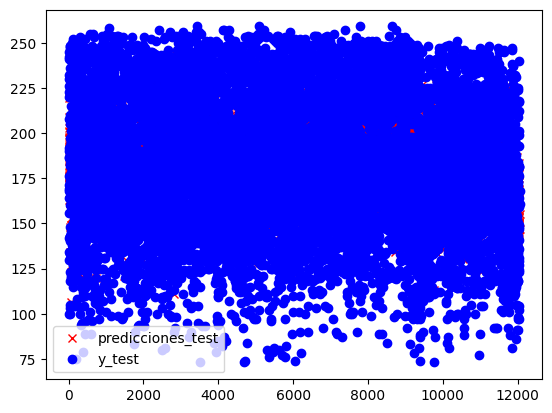

In [149]:
plt.plot(predicciones_test, "rx", label='predicciones_test')
plt.plot(y_test, "bo", label='y_test')
plt.legend()
plt.show()

377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


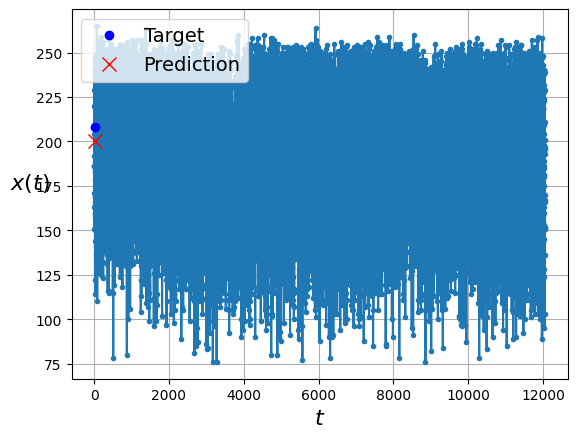

In [150]:
n_steps = 30
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    #plt.hlines(0, 0, 100, linewidth=1)
    #plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")


y_pred = model_loaded.predict(X_test)
plot_series(y_val[:], y_test[0], y_pred[0])
plt.show()

STEPS A HEAD

In [152]:
n_future = 7

print(df_y.shape)
print(df_prep.shape)

(120547, 1)
(120547, 13)


In [153]:
def df_to_X_y(df, df_y, n_future, window_size=30):
  df_as_np = df.to_numpy()
  df2_as_np = df_y.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size-n_future):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df2_as_np[i+window_size:i+window_size+n_future]
    y.append(label)
  return np.array(X), np.array(y)

In [154]:
X, y = df_to_X_y(df_prep, df_y, 7)
y = y[:,:,0]

In [155]:
train_limit = round(len(X)*0.80)
valid_limit = round(len(X)*0.90)

X_train, y_train = X[:train_limit], y[:train_limit]
X_val, y_val = X[train_limit:valid_limit], y[train_limit:valid_limit]
X_test, y_test = X[valid_limit:], y[valid_limit:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((96408, 30, 13),
 (96408, 7),
 (12051, 30, 13),
 (12051, 7),
 (12051, 30, 13),
 (12051, 7))

In [156]:
model_2 = Sequential()
model_2.add(Input(shape = (X_train.shape[1], X_train.shape[2])))
model_2.add(Bidirectional(LSTM(64, return_sequences=True)))
model_2.add(Bidirectional(LSTM(32)))
model_2.add(Dropout(0.5))
model_2.add(BatchNormalization())
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(n_future))
optimizer = Adam(learning_rate=0.0001)
model_2.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 30, 128)        │        39,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,719 (327.03 KB)

 Trainable params: 83,591 (326.53 KB)

 Non-trainable params: 128 (512.00 B)

In [157]:
history = model_2.fit(X_train, y_train, epochs=5, batch_size=30, validation_data=(X_val, y_val), verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

Epoch 1/5
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - loss: 9399.7744 - mae: 72.4123 - mse: 9399.7744 - val_loss: 1180.6814 - val_mae: 27.1279 - val_mse: 1180.6814
Epoch 2/5
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - loss: 1483.6849 - mae: 30.3639 - mse: 1483.6849 - val_loss: 1176.4071 - val_mae: 26.8180 - val_mse: 1176.4071
Epoch 3/5
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - loss: 1235.9349 - mae: 27.6532 - mse: 1235.9349 - val_loss: 1168.6742 - val_mae: 26.9473 - val_mse: 1168.6742
Epoch 4/5
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - loss: 1214.5134 - mae: 27.4738 - mse: 1214.5134 - val_loss: 1180.5083 - val_mae: 26.9765 - val_mse: 1180.5083
Epoch 5/5
3214/3214 ━━━━━━━━━━━━━━━━━━━━ 54s 17ms/step - loss: 1192.0807 - mae: 27.2640 - mse: 1192.0807 - val_loss: 1188.4232 - val_mae: 27.2349 - val_mse: 1188.4232


In [158]:
## Guardar el modelo
import joblib
joblib.dump(model_2, "my_model_10_epochs_7outputs.pkl")

['my_model_10_epochs_7outputs.pkl']

In [159]:
model_loaded = joblib.load("my_model_10_epochs_7outputs.pkl")

In [160]:
predicciones_test_2 = model_loaded.predict(X_test)
a = pd.DataFrame(predicciones_test_2)
a.head()

377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


,0,1,2,3,4,5,6
0,186.039459,184.493134,186.508224,187.018997,184.721466,187.121658,187.396072
1,188.646667,187.167801,188.955124,189.385986,186.681076,188.898880,188.865356
2,186.396851,184.896423,186.970215,187.454071,185.070328,187.426666,187.517441
3,192.190704,190.786591,192.495758,192.850754,189.745056,191.831619,191.423508
4,191.469147,190.087952,191.831573,192.181610,189.165726,191.288986,190.955765


In [161]:
b = pd.DataFrame(y_test)
b.head(5)

,0,1,2,3,4,5,6
0,151.0,201.0,103.0,170.0,166.0,151.0,208.0
1,201.0,103.0,170.0,166.0,151.0,208.0,242.0
2,103.0,170.0,166.0,151.0,208.0,242.0,187.0
3,170.0,166.0,151.0,208.0,242.0,187.0,164.0
4,166.0,151.0,208.0,242.0,187.0,164.0,220.0
